# 한국의 COVID-19 추이

최근 코로나 백신 보급이 이루어지고 있습니다. 이런 상황에서 코로나가 어느정도로 확산됐는지, 또 백신 보급 상황이 궁긍했습니다.

코로나 관련 데이터 셋을 모아 시각화 하고 분석해보았습니다.

# Overview

### 1. 서울 자치구별 확진자 분석

### 2. 백신 보급 추이와 전망

### 3. 2학기 대면수업 안전할까?

In [4]:
# 필요한 라이브러리 한번에 임포트
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# plot 스타일을 미리 정의해놓은 패키지
import seaborn as sns
import squarify

# 한글 폰트
plt.rcParams['font.family'] = 'AppleGothic'

# 1. 서울 자치구별 확진자 분석

### 공통으로 사용할 데이터 읽어오고 처리(코로나 지역별 확진자 수)

In [5]:
# 필요한 데이터 임포트
covid_seoul_region_df = pd.read_csv('covid_seoul_region.csv', index_col=0, engine='python', encoding='utf-8')
# 필터링
mask = covid_seoul_region_df.index != '20'
covid_seoul_region_df = covid_seoul_region_df.loc[mask, :]

# 불필요한 '수집일' 열 제거
covid_seoul_region_df = covid_seoul_region_df.drop('수집일', axis=1)
 
covid_seoul_region_total_df = covid_seoul_region_df.T[covid_seoul_region_df.T.index.str.contains("전체")]
covid_seoul_region_today_df = covid_seoul_region_df.T[covid_seoul_region_df.T.index.str.contains("추가")]

## 1-1 자치구 일자별 누적 확진자

In [6]:
covid_seoul_region_total_df

자치구 기준일,2021.06.13.00,2021.06.12.00,2021.06.11.00,2021.06.10.00,2021.06.09.00,2021.06.08.00,2021.06.07.00,2021.06.06.00,2021.06.05.00,2021.06.04.00,...,2020.03.08.10,2020.03.07.10,2020.03.06.10,2020.03.05.10,2020.03.04.10,2020.03.03.10,2020.03.02.10,2020.03.01.10,2020.02.29.10,2020.02.28.10
종로구 전체,781.0,780.0,778.0,774.0,769.0,768.0,767.0,765.0,764.0,762.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
중구 전체,704.0,703.0,700.0,692.0,687.0,688.0,687.0,686.0,682.0,676.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
용산구 전체,1251.0,1245.0,1238.0,1224.0,1213.0,1203.0,1194.0,1185.0,1181.0,1179.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
성동구 전체,1270.0,1266.0,1257.0,1254.0,1248.0,1243.0,1239.0,1236.0,1230.0,1223.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
광진구 전체,1522.0,1516.0,1506.0,1501.0,1495.0,1491.0,1486.0,1484.0,1481.0,1468.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0
동대문구 전체,1717.0,1703.0,1693.0,1683.0,1677.0,1674.0,1673.0,1668.0,1664.0,1658.0,...,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0
중랑구 전체,2063.0,2060.0,2056.0,2054.0,2048.0,2044.0,2040.0,2035.0,2029.0,2019.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
성북구 전체,1929.0,1925.0,1920.0,1909.0,1904.0,1902.0,1894.0,1887.0,1880.0,1864.0,...,6.0,6.0,5.0,5.0,5.0,5.0,3.0,2.0,2.0,2.0
강북구 전체,1347.0,1343.0,1332.0,1319.0,1313.0,1314.0,1310.0,1305.0,1302.0,1292.0,...,4.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
도봉구 전체,1441.0,1437.0,1436.0,1434.0,1430.0,1426.0,1424.0,1423.0,1422.0,1419.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


## 1-2 자치구 일자별 일일 확진자

In [7]:
covid_seoul_region_today_df

자치구 기준일,2021.06.13.00,2021.06.12.00,2021.06.11.00,2021.06.10.00,2021.06.09.00,2021.06.08.00,2021.06.07.00,2021.06.06.00,2021.06.05.00,2021.06.04.00,...,2020.03.08.10,2020.03.07.10,2020.03.06.10,2020.03.05.10,2020.03.04.10,2020.03.03.10,2020.03.02.10,2020.03.01.10,2020.02.29.10,2020.02.28.10
종로구 추가,1.0,2.0,4.0,5.0,1.0,1.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
중구 추가,1.0,2.0,8.0,5.0,2.0,2.0,5.0,4.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
용산구 추가,6.0,8.0,14.0,11.0,10.0,9.0,9.0,4.0,2.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
성동구 추가,4.0,9.0,3.0,6.0,5.0,4.0,4.0,6.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
광진구 추가,6.0,10.0,5.0,6.0,4.0,5.0,2.0,3.0,13.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
동대문구 추가,14.0,10.0,10.0,6.0,3.0,2.0,5.0,4.0,6.0,7.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
중랑구 추가,3.0,4.0,2.0,6.0,3.0,4.0,5.0,6.0,10.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
성북구 추가,4.0,5.0,11.0,5.0,2.0,8.0,6.0,7.0,16.0,9.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
강북구 추가,4.0,11.0,13.0,6.0,0.0,3.0,5.0,3.0,10.0,2.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
도봉구 추가,4.0,1.0,2.0,4.0,3.0,2.0,1.0,1.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 1-3 Treemap 을 이용해 확진자 시각화

서울 모든 구 확진자 수를 한눈에 볼 수 있도록 트리맵을 사용해서 살펴봤습니다.

트리맵은 한정된 공간에서 많은 수의 항목을 동시에 표시할 때 주로 사용하는데, 덕분에 서울의 모든 구를 한눈에 볼 수 있었습니다.

### 전처리

In [8]:
# Prepare Data
labels = covid_seoul_region_total_df.index.values.tolist()
sizes = covid_seoul_region_total_df.iloc[:,0]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

### 시각화

Text(0.5, 1.0, '코로나 발생자 수 지역 별 분석')

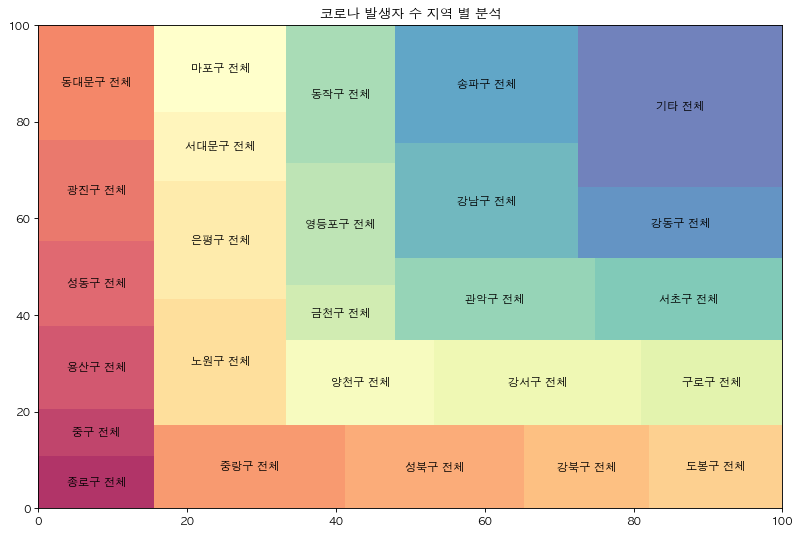

In [9]:
# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('코로나 발생자 수 지역 별 분석')

### 분석 결과

- 송파구, 강남구, 관악구, 서초구, 강서구에 확진자가 많이 발생했다.
- 종로구, 중구, 용산구, 성동구, 금천구 관진구에 확진자가 적게 발생했다.

## 1-4 누적 확진자가 많은 자치구, 적은 자치구 확인


### 전처리

In [10]:
totalCounts = covid_seoul_region_total_df.iloc[:,0]
totalCounts = totalCounts.sort_values(axis=0, ascending=False)
totalCounts = totalCounts.drop("기타 전체")

# 확진자 많은 지역 5개 
highIncidence = totalCounts.iloc[0: 5]

# 확진자 적은 지역 5개
lowIncidence = totalCounts.iloc[-5: ]

highIncidence

송파구 전체    2804.0
강남구 전체    2728.0
강서구 전체    2250.0
노원구 전체    2145.0
관악구 전체    2128.0
Name: 2021.06.13.00, dtype: float64

### 시각화

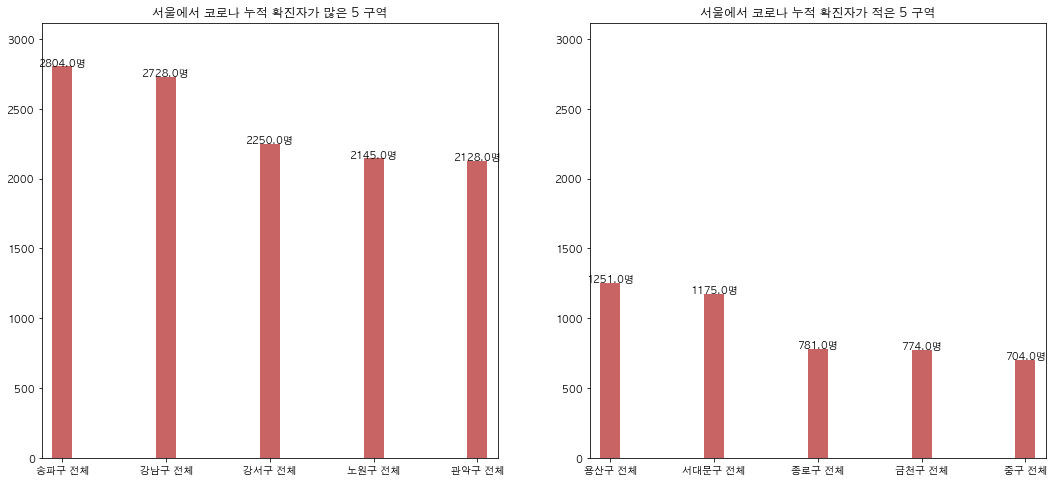

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0].set_title('서울에서 코로나 누적 확진자가 많은 5 구역')
ax[0].vlines(x=highIncidence.index, ymin=0, ymax=highIncidence.values, color='firebrick', alpha=0.7, linewidth=20)
ax[0].set_ylim([0, highIncidence.values.max()+ highIncidence.values.max() / 9])
for i, value in enumerate(highIncidence.values):
    ax[0].text(i, value+0.5, str(round(value, 1)) + "명", horizontalalignment='center')
    
ax[1].set_title('서울에서 코로나 누적 확진자가 적은 5 구역')
ax[1].vlines(x=lowIncidence.index, ymin=0, ymax=lowIncidence.values, color='firebrick', alpha=0.7, linewidth=20)
ax[1].set_ylim([0, highIncidence.values.max() + highIncidence.values.max() / 9])
for i, value in enumerate(lowIncidence.values):
    ax[1].text(i, value+0.5, str(round(value, 1)) + "명", horizontalalignment='center')

plt.show()

### 분석 결과

1. 용산구, 서대문구, 종로구, 금천구, 중구는 자치구에서 거주자 수가 적은편에 속함.
2. 송파구, 강남구, 강서구, 노원구, 관악구는 자치구에서 거주자 수가 많은편에 속함.
3. 주거 인구가 많은 지역일수록 상위권에 있고, 그 반대이면 하위권에 위치함을 알 수 있음.

참고 - 출처 - 위키피디아 서울 구역별 인구수(https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EC%9D%98_%ED%96%89%EC%A0%95_%EA%B5%AC%EC%97%AD)

## 1-5 최근 확진자가 많이 발생한 자치구, 적게 발생한 자치구 확인

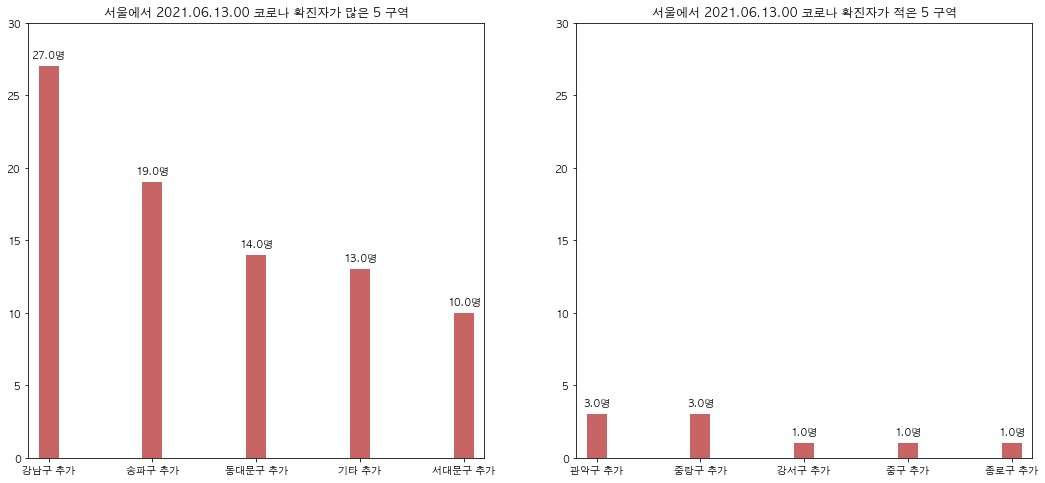

In [12]:
dayCounts = covid_seoul_region_today_df.iloc[:,0]
dayCounts = dayCounts.sort_values(axis=0, ascending=False)

# 확진자 많은 지역 5개 
highIncidence = dayCounts.iloc[0: 5]

# 확진자 적은 지역 5개
lowIncidence = dayCounts.iloc[-5: ]

f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].set_title('서울에서 2021.06.13.00 코로나 확진자가 많은 5 구역')
ax[0].vlines(x=highIncidence.index, ymin=0, ymax=highIncidence.values, color='firebrick', alpha=0.7, linewidth=20)
ax[0].set_ylim([0, highIncidence.values.max()+ highIncidence.values.max() / 9])
for i, value in enumerate(highIncidence.values):
    ax[0].text(i, value+0.5, str(round(value, 1)) + "명", horizontalalignment='center')
    
ax[1].set_title('서울에서 2021.06.13.00 코로나 확진자가 적은 5 구역')
ax[1].vlines(x=lowIncidence.index, ymin=0, ymax=lowIncidence.values, color='firebrick', alpha=0.7, linewidth=20)
ax[1].set_ylim([0, highIncidence.values.max() + highIncidence.values.max() / 9])
for i, value in enumerate(lowIncidence.values):
    ax[1].text(i, value+0.5, str(round(value, 1)) + "명", horizontalalignment='center')

plt.show()

## 분석 결과

최근 유동인구가 많은 강남구, 송파구, 동대문구와 같은 서울 동쪽 지역의 확진자가 많았음.

## 1-6 최종 분석

1. 주거 인구와 확진자 수는 비례한다.
2. 최근 유동인구가 많은 강남구, 송파구, 동대문구에 확진자가 많이 발생했다.


# 2. 백신 보급 추이와 전망 (최신 2021.06.12 데이터 기준)

## 2-1 최근 일자(2021.06.12) 백신 접종 추이

In [13]:
# 필요한 데이터 임포트
covid_vaccine_dataset_df = pd.read_csv('covid_vaccine_dataset.csv', index_col=0, engine='python', encoding='utf-8')

covid_vaccine_dataset_df.head()

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
접종일,,,,,,,
2021.06.12,3364288,82931,2157602,64.1,28724,533379,15.9
2021.06.11,3353331,165265,2070561,61.7,55544,504526,15.0
2021.06.10,3338670,148732,1900981,56.9,68440,448684,13.4
2021.06.09,3102614,104841,1746392,56.2,3076,380200,12.3
2021.06.08,3034302,131465,1636992,53.9,4672,377030,12.4


## 2-2 국민 중 몇프로나 백신 접종이 이루어 졌는지 확인

### 전처리

In [14]:
todayVaccine = covid_vaccine_dataset_df.iloc[:1].T
todayVaccine

# Prepare Data
primaryTotalLabel = '1차접종 누계'
secondaryTotalLabel = '2차접종 누계'

# 출처 구글: 세게은행 https://www.google.com/search?q=%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD+%EC%B4%9D+%EC%9D%B8%EA%B5%AC%EC%88%98&oq=%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD+%EC%B4%9D+%EC%9D%B8%EA%B5%AC%EC%88%98&aqs=chrome..69i57j0i3l2j0i131i433j0i3j69i65j69i61l2.2348j0j7&sourceid=chrome&ie=UTF-8
totalPopulationSouthKorea = 51710000


primaryTotal = todayVaccine.loc[primaryTotalLabel].values[0]
secondaryTotal = todayVaccine.loc[secondaryTotalLabel].values[0]


categories = [primaryTotalLabel, '1차 + 2차접종 완료 누계', '미접종자 국민']
data = [primaryTotal - secondaryTotal, secondaryTotal, totalPopulationSouthKorea - primaryTotal]
todayVaccine

접종일,2021.06.12
접종대상자,3364288.0
당일 1차접종자 수,82931.0
1차접종 누계,2157602.0
1차접종률(%),64.1
당일 2차접종자 수,28724.0
2차접종 누계,533379.0
2차접종률(%),15.9


### 시각화

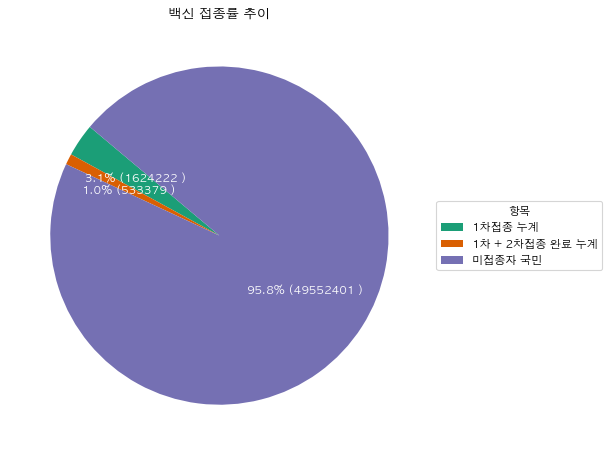

In [15]:
# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
explode = [0,0,0]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="항목", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("백신 접종률 추이")
plt.show()

### 분석
1. 백신을 1번이라도 접종한 인구는 전체 인구의 4.1%(1차 or 1차 + 2차 인구 합) 뿐임.
2. 전국민의 95.8% 는 아직 1차 접종조차 맞지 못함.
3. 억지스러운 계산이지만 107일 동안 4.1% 접종이 이루어짐.(첫 접종은 2021년 2월 26일 일, 2021년2월26일 부터 2021년6월13일 까지의 일수는 107)


## 2-3 언제쯤 전국민이 백신 접종을 받을 수 있을까? 크리스마스 백신 접종률 예측

In [16]:
vaccineData = covid_vaccine_dataset_df.iloc[:5].T
todayIncidenceVaccineData = vaccineData.loc['당일 1차접종자 수']
todayIncidenceVaccineData = todayIncidenceVaccineData.reindex(index=todayIncidenceVaccineData.index[::-1])

countTotals = vaccineData.loc['1차접종 누계']
countTotals = countTotals.reindex(index=countTotals.index[::-1])

avgidenceVaccine = (countTotals.values[countTotals.size-1] - countTotals.values[0]) / countTotals.values.size
avgidenceVaccine

from datetime import datetime, timedelta
nowDate = datetime(2021, 6, 13, 0, 0, 0) # datetime.now()
christmas = datetime(2021, 12, 25, 0, 0, 0)

def getVitualDataByDate(total, avgidenceVaccine, fromDate, days):
    return pd.Series(total + (avgidenceVaccine * days),index=[(nowDate + timedelta(days=days)).strftime("%Y.%m.%d")])


vitualCountTotals = countTotals.append(getVitualDataByDate(countTotals[countTotals.size-1],avgidenceVaccine, nowDate, 10))
vitualCountTotals = vitualCountTotals.append(getVitualDataByDate(vitualCountTotals[vitualCountTotals.size-1],avgidenceVaccine, nowDate, 30))
vitualCountTotals = vitualCountTotals.append(getVitualDataByDate(vitualCountTotals[vitualCountTotals.size-1],avgidenceVaccine, nowDate, 40))
vitualCountTotals = vitualCountTotals.append(getVitualDataByDate(vitualCountTotals[vitualCountTotals.size-1],avgidenceVaccine, nowDate, 70))
vitualCountTotals = vitualCountTotals.append(getVitualDataByDate(vitualCountTotals[vitualCountTotals.size-1],avgidenceVaccine, nowDate, 100))
vitualCountTotals = vitualCountTotals.append(getVitualDataByDate(vitualCountTotals[vitualCountTotals.size-1],avgidenceVaccine, nowDate, 120))
vitualCountTotals = vitualCountTotals.append(getVitualDataByDate(vitualCountTotals[vitualCountTotals.size-1],avgidenceVaccine, nowDate, 150))
vitualCountTotals = vitualCountTotals.append(getVitualDataByDate(vitualCountTotals[vitualCountTotals.size-1],avgidenceVaccine, nowDate, 180))
vitualCountTotals = vitualCountTotals.append(getVitualDataByDate(vitualCountTotals[vitualCountTotals.size-1],avgidenceVaccine, nowDate, abs((nowDate-christmas).days)))
print('최근 5일 동안 하루 평균 접종 인구: %d'% avgidenceVaccine)

최근 5일 동안 하루 평균 접종 인구: 104122


### 시각화

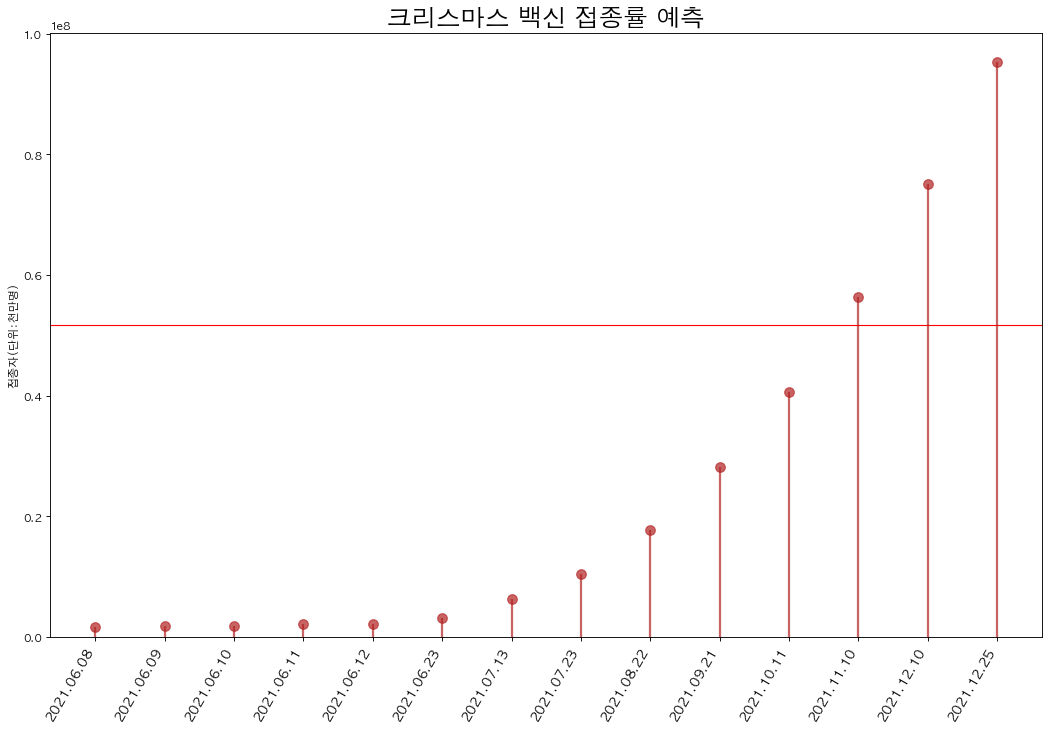

In [17]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=vitualCountTotals.index, ymin=0, ymax=vitualCountTotals.values, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=vitualCountTotals.index, y=vitualCountTotals.values, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('크리스마스 백신 접종률 예측', fontdict={'size':22})
ax.set_ylabel('접종자(단위:천만명)')

# 전국민 숫자를 가로선으로 긋는다.
plt.axhline(y=totalPopulationSouthKorea, color='r', linewidth=1)

ax.set_xticks(vitualCountTotals.index)
ax.set_xticklabels(vitualCountTotals.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})

# 만약 전국민 접종이 1번 이상 이뤄졌으면 최대치를 최대 접종에 맞춤
if (vitualCountTotals[vitualCountTotals.size-1] > totalPopulationSouthKorea):
    ax.set_ylim(0, vitualCountTotals[vitualCountTotals.size-1] + vitualCountTotals[vitualCountTotals.size-1] / 20)
else:
    ax.set_ylim(0, 60000000)

plt.show()

### 분석

1. 11월 정도 되어야 1차 접종이 완료될 것으로 예상됨(최근 5일 접종 속도 기준)

# 3. 2학기 대면수업 안전할까?

상위 분석들을 토대로 결과를 도출해봤습니다. 재미로 봐주시면 감사하겠습니다!



## 3-1 현재 긍정적인 요소와 부정적인 요소

### 긍정적인 요소
1. 누적 확진자만 보면 학교 근처 지역은 확진자가 적다. (가치 없음) 
2. 정말 단순하게 최근 백신 접종 속도만 보면 12월 10일 쯔음에는 국민 대부분 접종 가능 할 것 같음


### 부정적인 요소
1. 2021.06.13.00 확진자만 보면 학교 근처 지역의 확진자가 많다. (동대문, 서대문)
2. 12월 전국민 백신 접종이 완료되어도 2차 접종까지는 시간이 좀 걸릴 수 있음. 

## 3-2 결론

1. 자치구별 코로나 확진자는 거주자 인구수에 비례하는 경향이 있음

2. 주말에는 유동 인구가 많은 지역에 확진자가 많이 발생함

3. 현재 백신을 1번이라도 접종한 인구는 4.1%(1차 or 1차 + 2차 인구 합)뿐임

4. 지금의 백신 접종 속도를 기준(최근 5일)으로 11월은 되어야 전국민 1차 접종을 마칠 수 있을 것 같음


### 내 의견

백신 접종률 증가에 따라 확진자 수가 줄어들 것으로 보이나, 2학기 전면 대면은 섯부른 것이 아닌가 싶음. (유동 인구의 증가)

즉 백신을 국내에서 자체 생산하여 접종 속도가 증가하거나, 정치적인 변수가 생기지 않는한 2학기 까지는 위험한 시기라고 생각된다. 
